In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
from pmdarima import auto_arima

C:\Users\Administrator\AppData\Local\Temp\ipykernel_19312\3166362503.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  "month": pd.date_range(start="2020-01-01", periods=36, freq="M"),


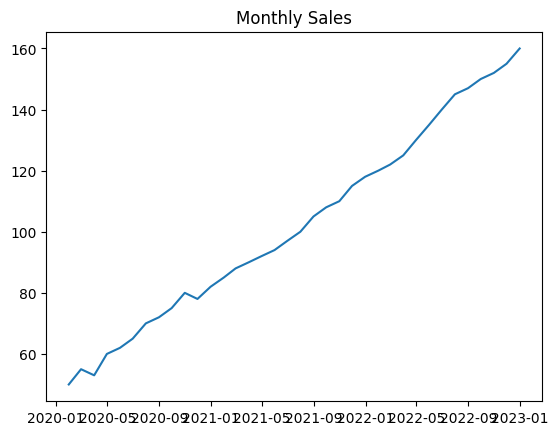

In [2]:
# Monthly sales for 3 years
data = {
    "month": pd.date_range(start="2020-01-01", periods=36, freq="M"),
    "sales": [50, 55, 53, 60, 62, 65, 70, 72, 75, 80, 78, 82,
              85, 88, 90, 92, 94, 97, 100, 105, 108, 110, 115, 118,
              120, 122, 125, 130, 135, 140, 145, 147, 150, 152, 155, 160]
}
df = pd.DataFrame(data)
df.set_index("month", inplace=True)

plt.plot(df.sales)
plt.title("Monthly Sales")
plt.show()